# Модуль 2: Основы нейронных сетей

## Теория

### Основные понятия
Что такое нейрон, слой, активация?

Определения:
1. Нейрон - это вычислительная единица, которая получает информацию, производит над ней простые вычисления и передает ее дальше. У каждого нейрона есть 2 параметра: входные данные (input data), выходные данные (output data). Типы нейронов: входной нейрон (input = output), скрытый нейрон - нейрон на промежуточном слое между входными и выходными нейронами (input data = суммарная информация всех нейронов с предыдущего слоя).
2. Слой - нейросеть состоит из большого количества нейронов. Нейроны одного типа объединяются в группу. Это и называется слоем.
3. Активация (функция активации) - функция преобразовывает линейную зависимость во входных данных в нелинейную. Это ее главная задача. Поскольку на линейной зависимости сеть не обучится. Вот ее формула: $activation_func(sum(weight * inputs + bias))$. Популярные функции активации: 
 - ReLU - $E(f) = [0, \infty)$ - уменьшение проблемы исчезающего градиента;
 - Sigmoid - $E(f) = [0, 1]$ - бинарная классификация;
 - Softmax - принимает список произвольных чисел и преобразует их в список вероятностей пропорциональных этим числам. Например, на вход подается список [1, 2, 3]. Тогда: $softmax([1, 2, 3]) = [0.09, 0.244, 0.665]$ - многоклассовая классификация;
 - Tanh - $E(f) = [-1, 1]$ - выходные значения tanh находятся в диапазоне от -1 до 1, что делает ее центрированной относительно нуля. Это выгодно, поскольку это может помочь процессу обучения, так как данные, проходящие через сеть, в среднем будут поддерживать среднее значение близкое к 0, что в свою очередь помогает оптимизации методом градиентного спуска. tanh часто используется в скрытых слоях.
 - Binary Step Function (ступенчатая) - первая использованная функция активации в контексте нейронных сетей. В наше время функция не часто используется в современных нейронных сетях, потому что она не дифференцируема на пороге $\theta$, что делает ее непригодной для использования с обратным распространением ошибки (методом, используемым для обучения нейронных сетей).
 $$
 f(x)=
 \begin{cases}
 0 & \quad \text{if $x < \theta$}\\ 
 1 & \quad \text{if $x \geq \theta$}
 \end{cases}
 $$

### Определение процессов

1. Обучение: Процесс настройки весов нейронной сети с использованием алгоритма обратного распространения ошибки (backpropagation) и оптимизации.
2. Переобучение (overfitting): Ситуация, когда модель слишком хорошо подстраивается под обучающие данные и плохо работает на новых данных.

### Важные определения для обучения модели

1. Функция потерь (Loss Function) - это математическая функция, которая измеряет, насколько хорошо модель предсказывает целевые значения. Она вычисляет разницу между предсказанными значениями моделью и фактическими значениями целевых переменных. Примеры:
 - Mean Squared Error (MSE): Используется для регрессионных задач, вычисляет среднюю квадратную ошибку между предсказанными и фактическими значениями.
- Cross-Entropy Loss: Используется для задач классификации, измеряет несоответствие между предсказанным вероятностным распределением и истинным распределением.

2. Оптимизатор — это алгоритм, который обновляет веса нейронной сети на основе градиента функции потерь. Он помогает находить минимальные значения функции потерь, которые означают хорошее предсказание моделью. Примеры оптимизаторов:
- Stochastic Gradient Descent (SGD): Обновляет веса, основываясь на одном или нескольких примерах из обучающего набора данных.
- Adam (Adaptive Moment Estimation): Комбинирует преимущества двух других методов: адаптивной скорости обучения и использование момента. Обычно работает лучше, особенно с глубокими сетями.

### Процесс обучения модели нейросети

Цель: подобрать веса модели, при которых функция потерь будет минимальной!
  
Итерация обучения модели состоит из шагов:
1. Прямое распространение (Forward Pass): Входные данные передаются через нейронную сеть, где каждый слой обрабатывает данные до тех пор, пока не будет получен финальный выход.
2. Вычисление функции потерь: После прямого распространения рассчитывается значение функции потерь, которое показывает, насколько хорошо модель справляется с этой задачей.
3. Обратное распространение (Backward Pass): Процесс, в котором вычисляются градиенты функции потерь по отношению к весам модели. Это позволяет понять, как изменять веса, чтобы уменьшить ошибку.
4. Обновление весов: Оптимизатор использует градиенты, чтобы обновить веса модели. Это повторяется многократно, пока не будет достигнуто приемлемое значение функции потерь.

## Задачи

In [1]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
# Указание в качестве девайса GPU если доступна
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [3]:
# Загрузка данных
train_data = datasets.MNIST(
    root="../data",
    train=True,
    download=True,
    transform=ToTensor())

test_data = datasets.MNIST(
    root="../data",
    train=False,
    download=True,
    transform=ToTensor())


In [5]:
# Создание DataLoaders
train_dataloader = DataLoader(
    train_data,
    batch_size=16,
    shuffle=True)

test_dataloader = DataLoader(
    test_data,
    batch_size=16,
    shuffle=True)


### Первая нейронная сеть:
Реализовать простую полносвязную нейронную сеть для задачи классификации MNIST. Использовать один скрытый слой и функцию активации ReLU.

<function matplotlib.pyplot.show(close=None, block=None)>

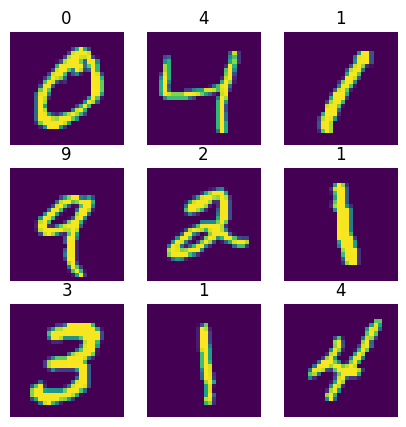

In [4]:
# Визуализация данных
figure = plt.figure(figsize=(5, 5))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    img, label = train_data[i]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze())

plt.show

Feature batch shape: torch.Size([16, 1, 28, 28])
Labels batch shape: torch.Size([16])


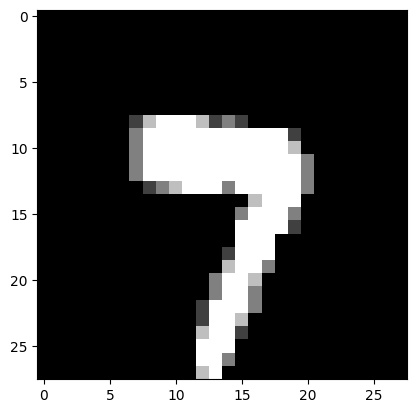

Label: 7


In [6]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [7]:
# Создание модели нейросети
# FCNN (Fully Connected Neural Network) - Полносвязная нейронная сеть (она же MLP - Многослойный перцептрон)
class NeuralNetwork(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        # Входной слой - перевод из 2D массива в 1D
        self.input_layer = nn.Flatten()
        # Скрытые слои
        self.hidden_1 = nn.Linear(28*28, 512) # Скрытый слой №1
        # Функция активации - переводит линейную связь в нелинейную
        self.activation_func_1 = nn.ReLU()
        
        self.hidden_2 = nn.Linear(512, 512) # Скрытый слой №2
        # Функция активации - переводит линейную связь в нелинейную
        self.activation_func_2 = nn.ReLU()

        # Выходной слой
        self.output_layer = nn.Linear(512, n_classes) # На выходе кол-во классов
        
        # Для удобства собираем все в один контейнер последовательный
        # Это сокращает и улучшает читаемость кода
        self.sequential_container = nn.Sequential(
            self.hidden_1,
            self.activation_func_1,
            self.hidden_2,
            self.activation_func_2,
            self.output_layer
        )

    def forward(self, x):
        # Изображение 2D проходит через входной слой, где преобразовывается в 1D массив
        x = self.input_layer(x)
        # Проход 1D вектора изображения через все слои нейросети
        # На выходе получаем логиты (кол-во логитов = кол-во классов)
        logits = self.sequential_container(x)

        return logits
    

In [11]:
# Создание объекта нейросети
model = NeuralNetwork(10).to(device=device) # сразу переводим модель на GPU
# Определение функции потерь
criterion = nn.CrossEntropyLoss()
# Выбор оптимизатора
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Обучение нейросети
model.train() # Перевод модели в стадию обучения

for epoch in tqdm(range(5)): # Обучение длится 5 эпох
    for data, target in train_dataloader:
        data = data.to(device) # Перенос всех данных на GPU
        target = target.to(device) # Перенос всех данных на GPU
        optimizer.zero_grad() # Обнуляем градиенты
        output = model(data) # Прямое распространение (данные проходят через все слои)
        loss = criterion(output, target) # Вычисление функции потерь
        loss.backward() # Обратное распространение
        optimizer.step()

print("Обучение завершено!")

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:49<00:00,  9.97s/it]

Обучение завершено!


In [13]:
# Расширение выходной информации об обучении модели
# + визуализация обучения модели
model = NeuralNetwork(10) # Определение модели

criterion = nn.CrossEntropyLoss() # Функция потерь для классификации
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


model.train()
all_losses = []
num_epochs = 5
for epoch in range(num_epochs):
    total_loss = 0
    for data, targets in train_dataloader:
        optimizer.zero_grad() # Обнуление градиентов
        outputs = model(data) # Пропуск данных через модель, на выходе логиты

        loss = criterion(outputs, targets) # Расчет функции потерь
        total_loss += loss.item()
        loss.backward() # Обратное распространение
        optimizer.step() # Оптимизатор обновляет веса согласно полученным значением градиентов   
    
    avg_loss = total_loss / len(train_dataloader) # Расчет среднего значения функции потерь на эпохе
    all_losses.append(avg_loss)
    # Вывод информации об обучении на эпохе
    print(f"Epoch {epoch + 1}/{num_epochs}. Loss: {avg_loss:.3f}")
    

Epoch 1/5. Loss: 0.196
Epoch 2/5. Loss: 0.088
Epoch 3/5. Loss: 0.062
Epoch 4/5. Loss: 0.050
Epoch 5/5. Loss: 0.041


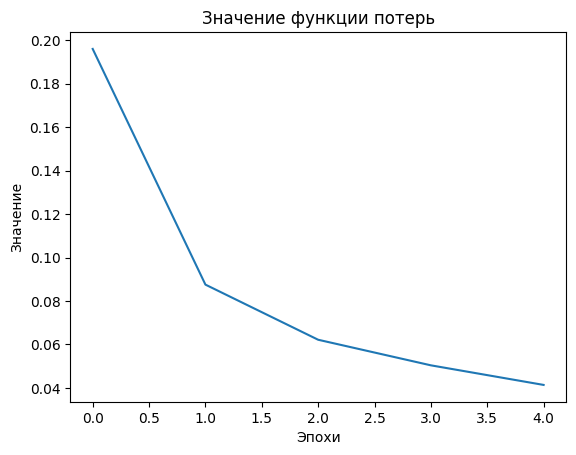

Обучение завершено!


In [14]:
# Визуализация обучения модели
plt.plot(all_losses)
plt.title('Значение функции потерь')
plt.xlabel('Эпохи')
plt.ylabel('Значение')
plt.show()
print('Обучение завершено!')

### Классификация с различными функциями активации:
Перепиши свою модель для использования функций активации Sigmoid, Tanh и Compare performance по метрикам (например, Precision, Recall, F1).

### Добавление слоев:
Увеличь количество скрытых слоев в своей модели до трех и экспериментируй с количеством нейронов в них. Проанализируй, как это влияет на производительность.

### Обучение с использованием SGD:
Создай свою модель и обучи ее, используя стохастический градиентный спуск (SGD). Сравни точность модели по сравнению с применением Adam в качестве оптимизатора.

### Регуляризация:
Реализуй технику регуляризации Dropout в своей нейронной сети и сравни результаты с полученными ранее.

### Датасет CIFAR-10:
Загрузите и предобработайте датасет CIFAR-10, реализуй нейронную сеть, используя архитектуру с несколькими слоями.

### Переобучение:
Намеренно создай переобученную модель, используя небольшое количество эпох для обучения, а затем продемонстрируй, как использовать валидационный набор для уменьшения переобучения.